In [ ]:
import numpy as np

# 확인할 .npz 파일 경로를 지정하세요
file_path = 'submodule/CONDOR/src/datasets/LAIR/capricorn/capricorn_0.npy'

data = np.load(file_path, allow_pickle=True)

# 변수 목록 출력
print("Variables in .npz:")

# 변수별 메타정보와 값 출력
for name in data.files:
    arr = data[name]
    print(f"\n=== {name} ===")
    print(f"shape = {arr.shape}, dtype = {arr.dtype}")




Variables in .npz:


AttributeError: 'numpy.ndarray' object has no attribute 'files'

In [20]:
import numpy as np

file_path = 'submodule/CONDOR/src/datasets/LAIR/double_loop/double_loop_0.npy'

# Load the .npy file
data = np.load(file_path, allow_pickle=True)

# Print basic info about the array
print("Loaded .npy file:")
print(f"Type: {type(data)}")
print(f"Shape: {data.shape}")
print(f"Dtype: {data.dtype}")

# If the data contains pickled Python objects (e.g., dict), check type and iterate accordingly
if isinstance(data, dict):
    for key, value in data.items():
        print(f"\n=== {key} ===")
        print(f"Type: {type(value)}")
        if isinstance(value, np.ndarray):
            print(f"Shape: {value.shape}, Dtype: {value.dtype}")
else:
    print(data)


Loaded .npy file:
Type: <class 'numpy.ndarray'>
Shape: (1, 364, 2)
Dtype: float64
[[[106. 276.]
  [107. 276.]
  [108. 275.]
  [110. 275.]
  [111. 274.]
  [113. 273.]
  [114. 273.]
  [116. 272.]
  [117. 272.]
  [118. 271.]
  [120. 270.]
  [122. 269.]
  [124. 269.]
  [125. 268.]
  [126. 267.]
  [127. 266.]
  [129. 266.]
  [130. 265.]
  [132. 263.]
  [134. 262.]
  [136. 261.]
  [138. 260.]
  [140. 259.]
  [144. 258.]
  [146. 257.]
  [149. 256.]
  [153. 254.]
  [158. 253.]
  [161. 252.]
  [165. 251.]
  [169. 250.]
  [172. 250.]
  [175. 249.]
  [178. 249.]
  [181. 248.]
  [184. 248.]
  [187. 248.]
  [190. 248.]
  [192. 247.]
  [195. 247.]
  [197. 247.]
  [200. 247.]
  [203. 247.]
  [206. 247.]
  [209. 247.]
  [213. 248.]
  [216. 249.]
  [219. 250.]
  [222. 252.]
  [224. 253.]
  [226. 254.]
  [228. 255.]
  [230. 257.]
  [231. 258.]
  [232. 259.]
  [234. 261.]
  [235. 262.]
  [237. 264.]
  [239. 266.]
  [239. 268.]
  [240. 270.]
  [241. 272.]
  [242. 273.]
  [242. 275.]
  [242. 276.]
  [242. 

Data preprocessing, demonstration 1 / 7
Data preprocessing, demonstration 2 / 7
Data preprocessing, demonstration 3 / 7
Data preprocessing, demonstration 4 / 7
Data preprocessing, demonstration 5 / 7
Data preprocessing, demonstration 6 / 7
Data preprocessing, demonstration 7 / 7
Mean error spline resampling: 1.5731265496603845e-16
--- Output Data Keys ---
dict_keys(['demonstrations train', 'demonstrations raw', 'demonstrations primitive id', 'n primitives', 'delta t eval', 'x min', 'x max', 'goals', 'goals training', 'max demonstration length', 'demonstrations length', 'eval indexes', 'n demonstrations', 'vel min train', 'vel max train', 'acc min train', 'acc max train'])


C:\Users\user\AppData\Local\Temp\ipykernel_17944\1937893535.py:52: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


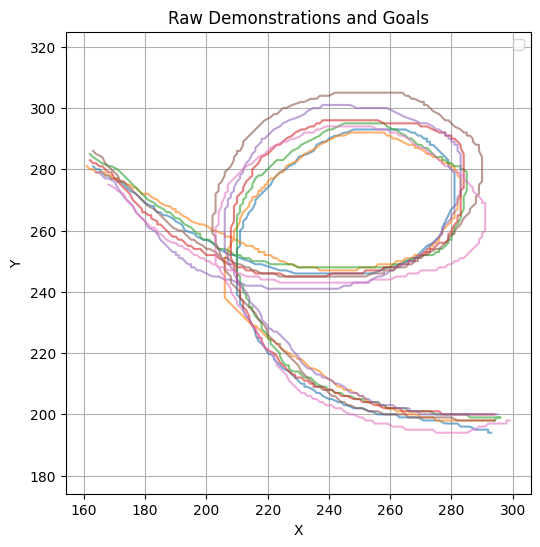

In [1]:
import os
import sys
base_dir = "C:/Users/user/Desktop/기시설/code"

src_path = os.path.join(base_dir, 'submodule', 'CONDOR', 'src')
sys.path.insert(0, src_path)
import matplotlib.pyplot as plt
from submodule.CONDOR.src.data_preprocessing.data_preprocessor import DataPreprocessor
from types import SimpleNamespace

# 1) Params 객체 정의 (필요한 필드만 간략히 작성)
params = SimpleNamespace(
    trajectories_resample_length=100,
    state_increment=0.1,
    workspace_dimensions=2,            # 2D
    dynamical_system_order=1,
    workspace_boundaries_type='from data',
    workspace_boundaries=[[0,0],[0,0]],# unused when 'from data'
    evaluation_samples_length=50,
    dataset_name='LAIR',
    selected_primitives_ids='0',     # 원하는 프리미티브 인덱스
    spline_sample_type='evenly spaced',
    imitation_window_size=10,
    verbose=False
)

# 2) 전처리 객체 생성 및 실행
preprocessor = DataPreprocessor(params)
output = preprocessor.run()

# 3) 원시 궤적과 목표점 가져오기
print("--- Output Data Keys ---")
print(output.keys()) # output 딕셔너리의 모든 키(데이터 이름)를 출력

raw_demos = output['demonstrations raw']       # list of arrays shape (2, T)
goals     = output['goals']                    # array shape (n_primitives, 2)

# 4) 시각화
plt.figure(figsize=(6,6))
for traj in raw_demos:
    x, y = traj[0], traj[1]
    plt.plot(x, y, alpha=0.6)
    

# 목표점은 붉은 X 마커로
# plt.scatter(goals[:,0], goals[:,1], c='r', marker='x', s=100, label='Goals')

plt.title('Raw Demonstrations and Goals')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
print(output['demonstrations train'].shape)
print(output["demonstrations raw"][1].shape)

(7, 100, 2, 10)
(2, 294)


In [6]:
output['demonstrations train'][0,0,0,:]

array([-0.81529582, -0.80808081, -0.8008658 , -0.78643579, -0.77922078,
       -0.76479076, -0.75757576, -0.74314574, -0.73593074, -0.72871573])

C:\Users\user\AppData\Local\Temp\ipykernel_11732\956816683.py:66: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(params.results_path + "encoder_triple

Avg Triplet Loss along trajectory: 0.126973


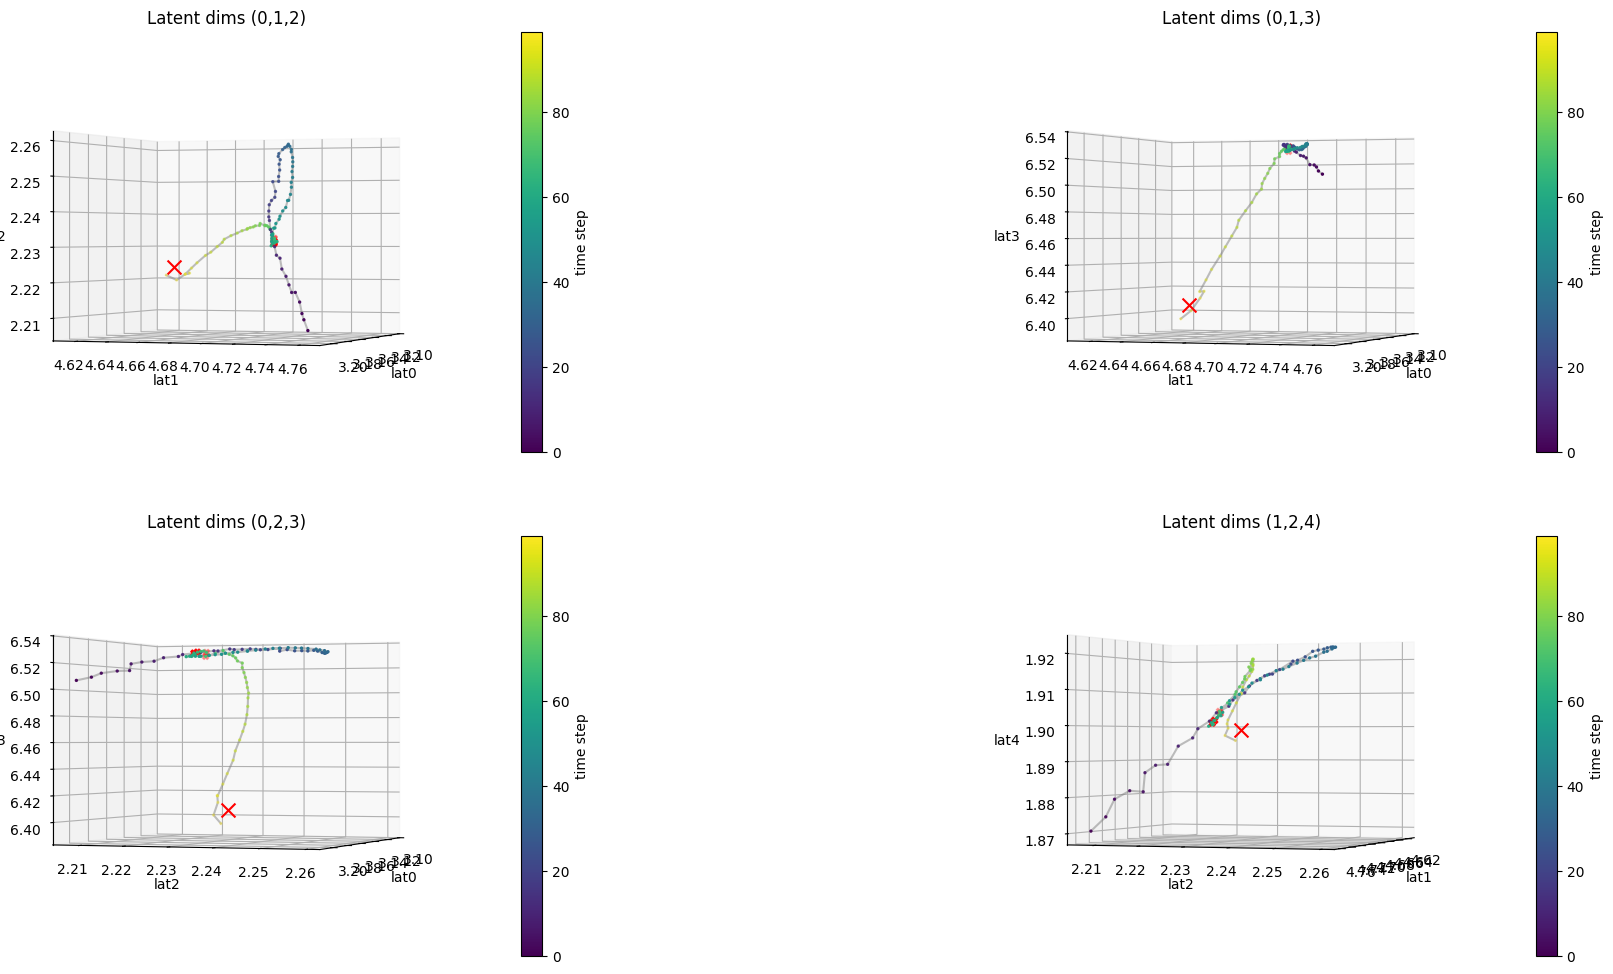

In [26]:
# %%
# Imports and setup
%matplotlib inline
import torch
import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass
from mpl_toolkits.mplot3d import Axes3D
import sys
import os
base_dir = "C:/Users/user/Desktop/기시설/code"

src_path = os.path.join(base_dir, 'submodule', 'CONDOR', 'src')
sys.path.insert(0, src_path)

# Condor pipeline imports
from submodule.CONDOR.src.data_preprocessing.data_preprocessor import DataPreprocessor
from encoder import Encoder

# %%
# Define or import TrainParams (same as used during training)
@dataclass
class InferenceParams:
    workspace_dimensions: int = 2
    dynamical_system_order: int = 2
    dataset_name: str = "LAIR"
    selected_primitives_ids: str = "0"
    trajectories_resample_length: int = 100
    state_increment: float = 0.2
    workspace_boundaries_type: str = "from data"
    workspace_boundaries: tuple = ((-1, 1),) * 3
    spline_sample_type: str = "evenly spaced"
    evaluation_samples_length: int = 10
    imitation_window_size: int = 2
    triplet_margin = 1e-4

    latent_space_dim: int = 300
    hidden_size: int = 300

    device: str = "cpu"
    results_path: str = "results/"

params = InferenceParams()

# %%
# 1. Load and preprocess data
data = DataPreprocessor(params=params, verbose=False).run()
# Use training or test demonstrations
demos = data['demonstrations train']  # shape: (n_traj, n_steps, dim_ws, window)
primitive_ids = np.array(data['demonstrations primitive id'])
n_primitives = data['n primitives']

# %%
# 2. Load trained encoder
dim_state = params.workspace_dimensions * params.dynamical_system_order
device = params.device
encoder = Encoder(
    dim_state=dim_state,
    n_primitives=n_primitives,
    latent_space_dim=params.latent_space_dim,
    hidden_size=params.hidden_size,
    device=device
).to(device)

# Load weights (ignoring missing goal buffer)
checkpoint = torch.load(params.results_path + "encoder_triplet_ver2.pt", map_location=device)
encoder.load_state_dict(checkpoint, strict=False)
encoder.eval()

# %%
# 3. Encode a single demonstration in latent space
traj_idx = 6  # index of trajectory to visualize
demo = demos[traj_idx]  # shape: (n_steps, dim_ws, window)
n_steps, dim_ws, window = demo.shape

latent_traj = []
for t in range(n_steps):
    pos = demo[t, :, 0]  # (dim_ws,)
    if params.dynamical_system_order == 2:
        next_pos = demo[t, :, 1]
        vel = next_pos - pos
        from submodule.CONDOR.src.agent.utils.dynamical_system_operations import normalize_state
        vel_norm = normalize_state(
            torch.tensor(vel).view(1, dim_ws, 1),
            x_min=torch.tensor(data['vel min train']).view(1, dim_ws, 1),
            x_max=torch.tensor(data['vel max train']).view(1, dim_ws, 1)
        ).squeeze()
        state_vec = torch.cat([torch.tensor(pos), vel_norm], dim=0)
    else:
        state_vec = torch.tensor(pos)

    x_input = state_vec.view(1, -1).float().to(device)
    prim_tensor = torch.tensor([primitive_ids[traj_idx]], device=device)
    with torch.no_grad():
        lat = encoder(x_input, prim_tensor).cpu().numpy().squeeze()
    latent_traj.append(lat)

latent_traj = np.stack(latent_traj)  # shape: (n_steps, latent_space_dim)

# %%
# 3.5. Compute goal embedding on the fly
prim_id = primitive_ids[traj_idx]
goal_pos = data['goals training'][prim_id]   # (dim_ws,)

if params.dynamical_system_order == 2:
    zero_vel = np.zeros_like(goal_pos)
    from submodule.CONDOR.src.agent.utils.dynamical_system_operations import normalize_state
    vel_norm_goal = normalize_state(
        torch.tensor(zero_vel).view(1, dim_ws, 1),
        x_min=torch.tensor(data['vel min train']).view(1, dim_ws, 1),
        x_max=torch.tensor(data['vel max train']).view(1, dim_ws, 1)
    ).squeeze()
    x_goal = torch.cat([torch.tensor(goal_pos), vel_norm_goal], dim=0)
else:
    x_goal = torch.tensor(goal_pos)

x_goal = x_goal.view(1, -1).float().to(device)
prim_tensor = torch.tensor([prim_id], device=device)

with torch.no_grad():
    goal_lat = encoder(x_goal, prim_tensor).cpu().numpy().squeeze()  # (latent_space_dim,)
    
    


margin = params.triplet_margin if hasattr(params, 'triplet_margin') else 1.0
loss_fn = torch.nn.TripletMarginLoss(margin=margin, p=2)

# 텐서 변환
latents = torch.tensor(latent_traj, dtype=torch.float32)       # (n_steps, latent_dim)
goal = torch.tensor(goal_lat, dtype=torch.float32).unsqueeze(0) # (1, latent_dim)
# 반복: 마지막 스텝은 다음 스텝이 없으므로 n_steps-1까지만
losses = []
for t in range(latents.size(0) - 1):
    # viz 쪽
    anchor   = torch.tensor(goal_lat).unsqueeze(0)
    positive = latents[t+1].unsqueeze(0)
    negative = latents[t].unsqueeze(0)
    l = loss_fn(anchor, positive, negative)

    losses.append(l.item())

triplet_loss = float(np.sum(losses))
print(f"Avg Triplet Loss along trajectory: {triplet_loss:.6f}")

# %%
# 4. Plot 3D subplots including on-the-fly goal
combinations = [(0,1,2), (0,1,3), (0,2,3), (1,2,4)]
# 4. Plot 3D subplots with gradient color
fig = plt.figure(figsize=(24, 12))
t_idxs = np.arange(latent_traj.shape[0])  # 시간 인덱스 0,1,...,n_steps-1
special_idxs = [65, 66, 69, 70]
for i, (a,b,c) in enumerate(combinations, 1):
    ax = fig.add_subplot(2, 2, i, projection='3d')
    ax.plot(latent_traj[:, a], latent_traj[:, b], latent_traj[:, c],
            color='gray', alpha=0.5)
            
    sc = ax.scatter(
        latent_traj[:, a], latent_traj[:, b], latent_traj[:, c],
        c=t_idxs,           # 각 점에 색 지정
        cmap='viridis',     # matplotlib colormap
        s=2                # 점 크기
    )
    
    mask = np.isin(t_idxs, special_idxs)
    ax.scatter(latent_traj[mask, a], latent_traj[mask, b], latent_traj[mask, c],
               c='red', marker='X', s=20, label='special points')
    
    ax.scatter(goal_lat[a], goal_lat[b], goal_lat[c],
               marker='x', s=100, c='red', label='goal')
    X = latent_traj[:-1, a]
    Y = latent_traj[:-1, b]
    Z = latent_traj[:-1, c]
    U = latent_traj[1:, a] - X
    V = latent_traj[1:, b] - Y
    W = latent_traj[1:, c] - Z
    # ax.quiver(X, Y, Z, U, V, W,
            #   length=0.001, normalize=True, color='red', linewidth=0.1)
    # 컬러바 추가
    fig.colorbar(sc, ax=ax, pad=0.1, label='time step')
    ax.set_xlabel(f'lat{a}')
    ax.set_ylabel(f'lat{b}')
    ax.set_zlabel(f'lat{c}')
    ax.set_title(f'Latent dims ({a},{b},{c})')
    ax.view_init(elev=0, azim=20)



In [9]:
losses

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.005221366882324219,
 0.0,
 0.0,
 0.0,
 0.0,
 0.6975992321968079,
 0.0,
 0.9780706763267517,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01514899730682373,
 0.0,
 0.0,
 0.0,
 0.022648394107818604,
 0.0,
 0.0,
 0.0,
 0.02190709114074707,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.004931598901748657,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0017861882224678993]

In [ ]:

state_traj.shape

(100, 4)

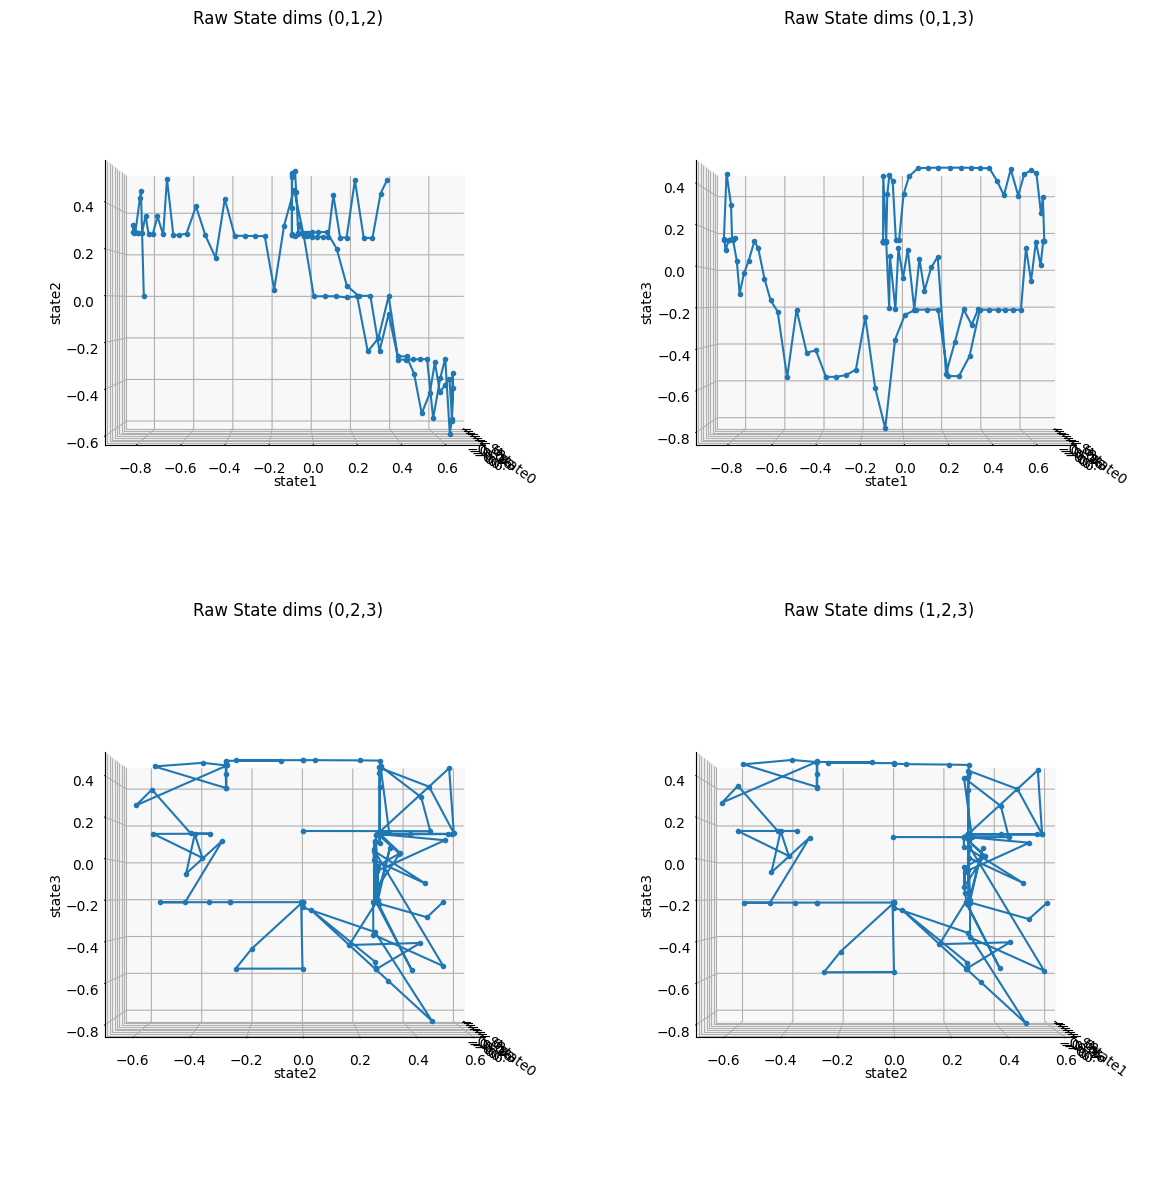

In [4]:
# %% 
# 5. Plot raw state trajectories for the same demo
# 원본 state 차원: dim_state = workspace_dimensions * dynamical_system_order
state_traj = []  # shape: (n_steps, dim_state)
for t in range(n_steps):
    pos = demo[t, :, 0]  # 위치
    if params.dynamical_system_order == 2:
        next_pos = demo[t, :, 1]
        vel = next_pos - pos
        # 정규화(선택 사항; latent와 동일하게 보려면 정규화하세요)
        from submodule.CONDOR.src.agent.utils.dynamical_system_operations import normalize_state
        vel_norm = normalize_state(
            torch.tensor(vel).view(1, dim_ws, 1),
            x_min=torch.tensor(data['vel min train']).view(1, dim_ws, 1),
            x_max=torch.tensor(data['vel max train']).view(1, dim_ws, 1)
        ).squeeze().numpy()
        state_vec = np.concatenate([pos, vel_norm], axis=0)
    else:
        state_vec = pos
    state_traj.append(state_vec)
state_traj = np.stack(state_traj)  # (n_steps, dim_state)

# 6. 3D raw state subplots (first 3 dims of state_vec)
fig = plt.figure(figsize=(12,12))
# we only have dim_state=4 at most, so we can do same 4 combos:
for i, (a,b,c) in enumerate(combinations, 1):
    ax = fig.add_subplot(2,2,i, projection='3d')
    ax.plot(
        state_traj[:, a], 
        state_traj[:, b], 
        state_traj[:, c], 
        marker='o', 
        markersize=3
    )
    ax.set_xlabel(f'state{a}')
    ax.set_ylabel(f'state{b}')
    ax.set_zlabel(f'state{c}')
    ax.set_title(f'Raw State dims ({a},{b},{c})')
    ax.view_init(elev=0, azim=0)
plt.tight_layout()
plt.show()


In [31]:
import numpy as np
from sklearn.neighbors import KDTree

def bbox_overlap_nd(Pi, Pi1, Pj, Pj1):
    """ND 바운딩 박스 겹침 여부"""
    D = Pi.shape[0]
    for dim in range(D):
        min_i, max_i = min(Pi[dim], Pi1[dim]), max(Pi[dim], Pi1[dim])
        min_j, max_j = min(Pj[dim], Pj1[dim]), max(Pj[dim], Pj1[dim])
        if max_i < min_j or max_j < min_i:
            return False
    return True

def segments_intersect_nd(Pi, Pi1, Pj, Pj1, tol=1e-8):
    """
    두 ND 선분 [Pi, Pi1], [Pj, Pj1]의 교차 여부 (파라메트릭 최소자승).
    returns: (intersects, t, s, residual_norm)
    """
    di = Pi1 - Pi
    dj = Pj1 - Pj
    D = Pi.shape[0]
    # A: D×2, b: D×1
    A = np.stack([di, -dj], axis=1)    # shape (D,2)
    b = (Pj - Pi).reshape(D, 1)        # shape (D,1)
    sol, residuals, rank, _ = np.linalg.lstsq(A, b, rcond=None)
    t, s = sol.flatten()
    if rank < 2:
        return False, None, None, None
    if residuals.size > 0:
        norm = np.sqrt(residuals[0])
    else:
        res = A.dot(sol) - b
        norm = np.linalg.norm(res)
    intersects = (0 - tol <= t <= 1 + tol and
                  0 - tol <= s <= 1 + tol and
                  norm < tol)
    return intersects, t, s, norm

def has_self_intersection_nd(traj, tol=1):
    """
    traj: ndarray of shape (n_points, D)
    returns: (bool, (i,j), t, s, norm)
    """
    n, D = traj.shape
    mids = np.array([(traj[i] + traj[i+1]) / 2 for i in range(n-1)])
    tree = KDTree(mids)
    for i in range(n-1):
        di = traj[i+1] - traj[i]
        radius = np.linalg.norm(di) * 2
        idxs = tree.query_radius([mids[i]], r=radius)[0]
        for j in idxs:
            if abs(i - j) <= 1 or (i == 0 and j == n-2):
                continue
            if not bbox_overlap_nd(traj[i], traj[i+1], traj[j], traj[j+1]):
                continue
            inter, t, s, norm = segments_intersect_nd(
                traj[i], traj[i+1], traj[j], traj[j+1], tol)
            if inter:
                return True, (i, j), t, s, norm
    return False, None, None, None, None

# === 예시: 100×2 랜덤 데이터로 실행 ===
np.random.seed(0)
traj2d = latent_traj[:,0:2]
intersected, pair, t, s, norm = has_self_intersection_nd(traj2d)
if intersected:
    i, j = pair
    print(f"Self-intersecting at segments ({i},{i+1})↔({j},{j+1})")
    print(f" t={t:.4f}, s={s:.4f}, residual norm={norm:.2e}")
else:
    print("No self-intersection found on 2D trajectory.")


Self-intersecting at segments (6,7)↔(47,48)
 t=0.7786, s=0.5182, residual norm=2.33e-10


In [33]:
import numpy as np
from sklearn.neighbors import KDTree

def bbox_overlap_nd(Pi, Pi1, Pj, Pj1):
    """Check overlap of axis-aligned bounding boxes in N dimensions."""
    D = Pi.shape[0]
    for dim in range(D):
        min_i, max_i = min(Pi[dim], Pi1[dim]), max(Pi[dim], Pi1[dim])
        min_j, max_j = min(Pj[dim], Pj1[dim]), max(Pj[dim], Pj[dim])
        if max_i < min_j or max_j < min_i:
            return False
    return True

def segments_intersect_nd(Pi, Pi1, Pj, Pj1, tol=1e-8):
    """
    Determine intersection of two N-D segments [Pi, Pi1] and [Pj, Pj1]
    via least-squares parametric solution.
    Returns (intersects: bool, t: float, s: float, residual_norm: float).
    """
    di = Pi1 - Pi
    dj = Pj1 - Pj
    A = np.stack([di, -dj], axis=1)      # shape (D, 2)
    b = (Pj - Pi).reshape(-1, 1)          # shape (D, 1)
    sol, residuals, rank, _ = np.linalg.lstsq(A, b, rcond=None)
    t, s = sol.flatten()
    if rank < 2:
        return False, None, None, None
    if residuals.size > 0:
        norm = np.sqrt(residuals[0])
    else:
        norm = np.linalg.norm(A.dot(sol) - b)
    intersects = ( -tol <= t <= 1+tol and -tol <= s <= 1+tol and norm < tol )
    return intersects, t, s, norm

def find_all_self_intersections_nd(traj, tol=1e-8):
    """
    Find all self-intersecting segment pairs in an N-D trajectory.
    Returns a list of tuples: (i, j, t, s, norm),
    where segments are [traj[i], traj[i+1]] and [traj[j], traj[j+1]].
    """
    n, D = traj.shape
    # Compute midpoints of each segment for spatial indexing
    mids = np.array([(traj[i] + traj[i+1]) / 2 for i in range(n-1)])
    tree = KDTree(mids)
    intersections = []

    for i in range(n-1):
        # search radius: twice the segment length
        radius = np.linalg.norm(traj[i+1] - traj[i]) * 2
        candidates = tree.query_radius([mids[i]], r=radius)[0]

        for j in candidates:
            # skip adjacent segments or first-last wrap
            if abs(i - j) <= 1 or (i == 0 and j == n-2):
                continue
            # bounding-box 빠른 검사
            if not bbox_overlap_nd(traj[i], traj[i+1], traj[j], traj[j+1]):
                continue
            inter, t, s, norm = segments_intersect_nd(
                traj[i], traj[i+1], traj[j], traj[j+1], tol
            )
            if inter:
                intersections.append((i, j, t, s, norm))

    return intersections

# === 예시 실행 ===
if __name__ == "__main__":
    np.random.seed(0)
    # 예시용 2D 궤적: 100개 랜덤 점
    traj2d = latent_traj[:,0:4]
    results = find_all_self_intersections_nd(traj2d, tol=1)

    if results:
        print(f"Found {len(results)} self-intersections:")
        for (i, j, t, s, norm) in results:
            print(f" Segments ({i},{i+1}) ↔ ({j},{j+1}): "
                  f"t={t:.4f}, s={s:.4f}, residual_norm={norm:.2e}")
    else:
        print("No self-intersection found on 2D trajectory.")


Found 4 self-intersections:
 Segments (54,55) ↔ (56,57): t=0.7664, s=-0.2977, residual_norm=1.47e-04
 Segments (61,62) ↔ (59,60): t=0.3963, s=1.5562, residual_norm=4.94e-05
 Segments (94,95) ↔ (96,97): t=1.6520, s=1.5688, residual_norm=3.63e-03
 Segments (96,97) ↔ (94,95): t=1.5688, s=1.6520, residual_norm=3.63e-03


In [ ]:
import numpy as np
from sklearn.neighbors import KDTree

def segment_distance_nd(P0, P1, Q0, Q1):
    """
    Compute the minimum distance between segments P(s)=P0 + s*(P1-P0), s∈[0,1]
    and Q(t)=Q0 + t*(Q1-Q0), t∈[0,1], in N dimensions.
    Returns: (distance, s_clamped, t_clamped)
    """
    u = P1 - P0
    v = Q1 - Q0
    w0 = P0 - Q0

    a = np.dot(u, u)        # |u|^2
    b = np.dot(u, v)
    c = np.dot(v, v)        # |v|^2
    d = np.dot(u, w0)
    e = np.dot(v, w0)

    D = a*c - b*b           # denominator

    # if segments are not parallel, compute unconstrained s,t
    if D > 1e-12:
        s = (b*e - c*d) / D
        t = (a*e - b*d) / D
    else:
        # parallel case: choose s=0, solve t to minimize distance to P0
        s = 0.0
        t = e / c if c > 1e-12 else 0.0

    # clamp s,t to [0,1]
    s_clamped = np.clip(s, 0.0, 1.0)
    t_clamped = np.clip(t, 0.0, 1.0)

    # recompute closest points
    P_closest = P0 + s_clamped * u
    Q_closest = Q0 + t_clamped * v
    dist = np.linalg.norm(P_closest - Q_closest)
    return dist, s_clamped, t_clamped

def all_segments_separated_nd(traj, min_dist, tol=1e-8):
    """
    Check all non-adjacent segment pairs in trajectory traj (shape: [n, D])
    are at least min_dist apart.
    Returns list of violating pairs: [(i, j, dist, s, t), ...].
    """
    n, D = traj.shape
    mids = np.array([(traj[i] + traj[i+1]) / 2 for i in range(n-1)])
    tree = KDTree(mids)
    violations = []

    for i in range(n-1):
        # 후보를 찾기 위한 반경: segment 길이 + min_dist
        seg_len = np.linalg.norm(traj[i+1] - traj[i])
        radius = seg_len + min_dist
        idxs = tree.query_radius([mids[i]], r=radius)[0]

        for j in idxs:
            if abs(i - j) <= 1 or (i == 0 and j == n-2):
                continue

            # 빠른 바운딩 박스 검사 (min_dist 확장)
            Pi, Pi1 = traj[i], traj[i+1]
            Pj, Pj1 = traj[j], traj[j+1]
            for dim in range(D):
                min_i, max_i = sorted((Pi[dim], Pi1[dim]))
                min_j, max_j = sorted((Pj[dim], Pj1[dim]))
                if max_i + min_dist < min_j or max_j + min_dist < min_i:
                    break
            else:
                # 실제 거리 계산
                dist, s, t = segment_distance_nd(Pi, Pi1, Pj, Pj1)
                if dist < min_dist - tol:
                    violations.append((i, j, dist, s, t))

    return violations

# === 사용 예시 ===
if __name__ == "__main__":
    np.random.seed(0)
    traj2d = latent_traj
    # 최소 0.05 이상 떨어져 있어야 한다고 설정
    min_distance = 0.05
    viols = all_segments_separated_nd(traj2d, min_distance)

    if viols:
        print(f"{len(viols)}개의 분리 위반(segment pairs)이 발견되었습니다:")
        for i, j, dist, s, t in viols:
            print(f"  세그먼트 ({i},{i+1})↔({j},{j+1}): 거리가 {dist:.4f}, s={s:.3f}, t={t:.3f}")
    else:
        print(f"모든 세그먼트 쌍이 최소 {min_distance}만큼 분리되어 있습니다.")
